The primary objective of this project is to develop a machine learning model that accurately predicts movie ratings. By analyzing historical movie data and employing regression techniques, the model will estimate ratings based on specific features.
The Movie Rating Prediction project leverages data analysis and machine learning techniques to estimate movie ratings, providing valuable insights into the factors influencing ratings. By accurately predicting ratings, the project aims to contribute to the decision-making processes in the film industry and enhance the viewer experience through better recommendations and content discovery.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
import pandas as pd

# Try reading the file with different encodings
file_path ='DatasetMovieRatingPred.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='iso-8859-1')

# Alternatively, using errors='replace' or 'ignore'
# df = pd.read_csv(file_path, encoding='utf-8', errors='replace')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
# dropping dupliactes
df.drop_duplicates(inplace=True)

In [8]:
#  checking for null values
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [9]:
# dropping all the null values 
df.dropna(inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,5659.0,5.898533,1.381165,1.1,5.0,6.1,6.9,10.0


In [11]:
df.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,5385,91,174,376,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,90,41,104,52,57


In [12]:
print("Year")
print(df["Year"].unique())
print("Duration")
print(df["Duration"].unique())
print("Votes")
print(df["Votes"].unique())

Year
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(2008)' '(1994)' '(2007)' '(2003)' '(1998)' '(1979)' '(1974)' '(2015)'
 '(2006)' '(1981)' '(2020)' '(1985)' '(2013)' '(2011)' '(1988)' '(1987)'
 '(1999)' '(1973)' '(1968)' '(1982)' '(1977)' '(1950)' '(1969)' '(1948)'
 '(1990)' '(1989)' '(2001)' '(2000)' '(1953)' '(1978)' '(1963)' '(1992)'
 '(1976)' '(1984)' '(1986)' '(1966)' '(1975)' '(1980)' '(1967)' '(1970)'
 '(1952)' '(1972)' '(1971)' '(1964)' '(1954)' '(1962)' '(1957)' '(1965)'
 '(1996)' '(1995)' '(1956)' '(1955)' '(1936)' '(1983)' '(1951)' '(1961)'
 '(1959)' '(1949)' '(1960)' '(1946)' '(1940)' '(1945)' '(1938)' '(1941)'
 '(1942)' '(1935)' '(1937)' '(1947)' '(1931)' '(1933)' '(1943)' '(1944)'
 '(1932)' '(1939)' '(1934)']
Duration
['109 min' '110 min' '147 min' '142 min' '82 min' '116 min' '96 min'
 '120 min' '161 min' '166 min' '102 min' '87 min' '132 min' '105 min'
 '146 min' '168

In [13]:
# cleaning the data
df["Year"]=df["Year"].str.strip("()").astype(int)
df["Duration"]=df["Duration"].str.replace(" min","").astype(int)
df["Votes"]=df["Votes"].str.replace(",","").astype(int)

In [14]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


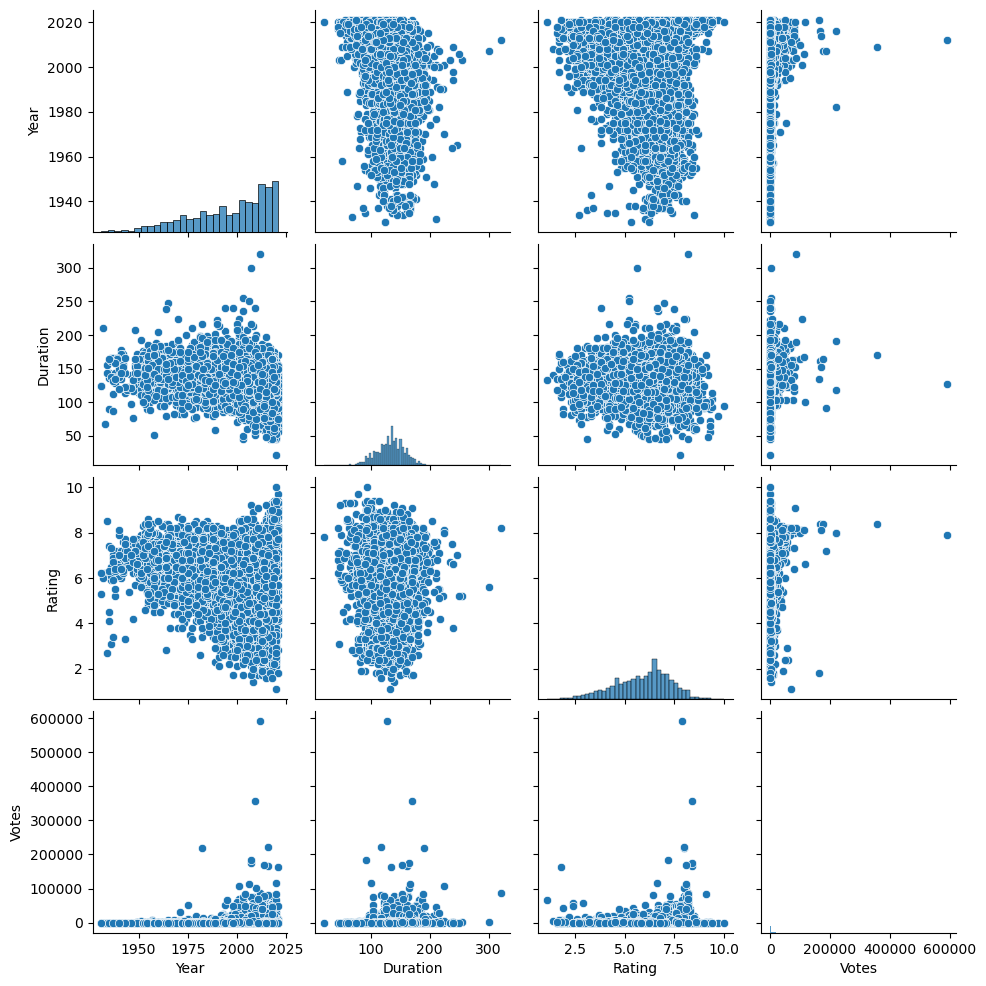

In [15]:
sns.pairplot(df)

/var/folders/wn/j1knt4w96cqb52gb4fnnzrtw0000gn/T/ipykernel_2537/147796897.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Year"])


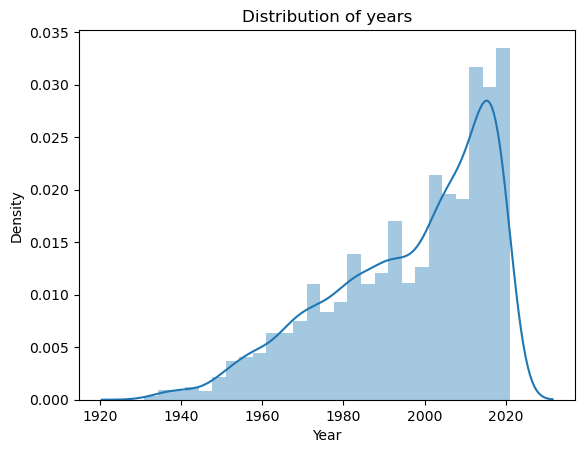

In [16]:
# univariate analysis

sns.distplot(df["Year"])
plt.title("Distribution of years")
plt.show()

/var/folders/wn/j1knt4w96cqb52gb4fnnzrtw0000gn/T/ipykernel_2537/2451880158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


Text(0.5, 1.0, 'Distribution of movie ratings')

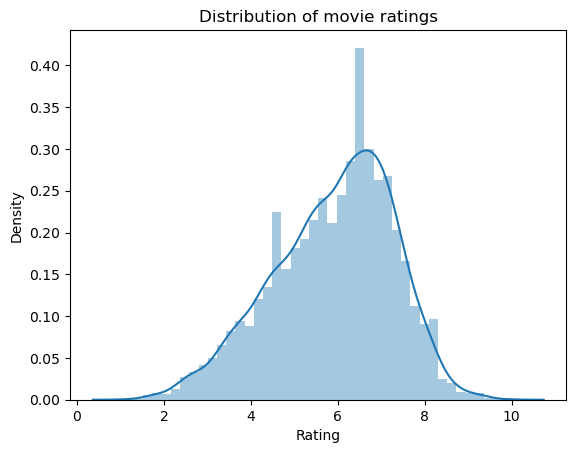

In [17]:
sns.distplot(df["Rating"])
plt.title("Distribution of movie ratings")

Text(0.5, 1.0, 'does duration affects the rating')

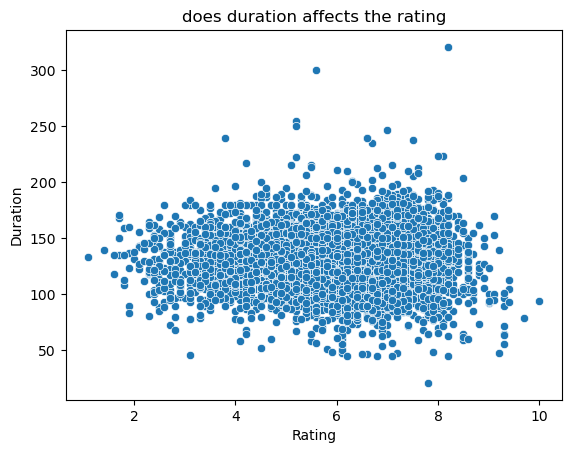

In [18]:
sns.scatterplot(y="Duration",x="Rating",data=df)
plt.title("does duration affects the rating")

Text(0.5, 1.0, 'how votes affects the rating')

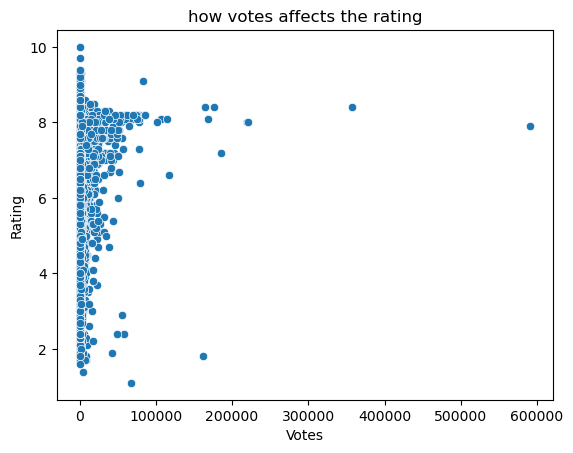

In [19]:
sns.scatterplot(x="Votes",y="Rating",data=df)
plt.title("how votes affects the rating")

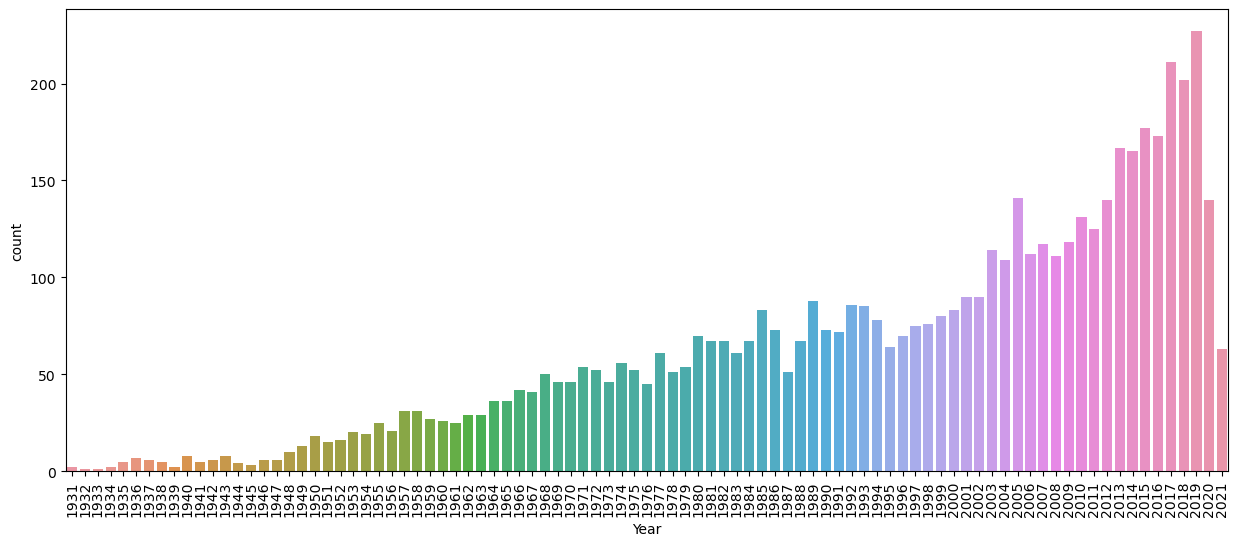

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["Year"])
plt.xticks(rotation=90)
plt.show()

In [21]:
top_10=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top_10

TOP_10 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,"Documentary, Family, History",9.3
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
11843,Refl3ct,Sci-Fi,9.3


In [22]:
top_10=df[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP_10 based on votes")
top_10

TOP_10 based on votes


,Name,Genre,Votes
8219,Life of Pi,"Adventure, Drama, Fantasy",591417
75,3 Idiots,"Comedy, Drama",357889
8233,Lion,"Biography, Drama",220526
4848,Gandhi,"Biography, Drama, History",220118
14038,The Darjeeling Limited,"Adventure, Comedy, Drama",185127
8228,Like Stars on Earth,"Drama, Family",175810
10882,PK,"Comedy, Drama, Musical",168150
3410,Dangal,"Action, Biography, Drama",165074
11463,Radhe,"Action, Crime, Thriller",162455
3829,Dil Bechara,"Comedy, Drama, Romance",117377


Text(0.5, 1.0, 'Director with no of movies ')

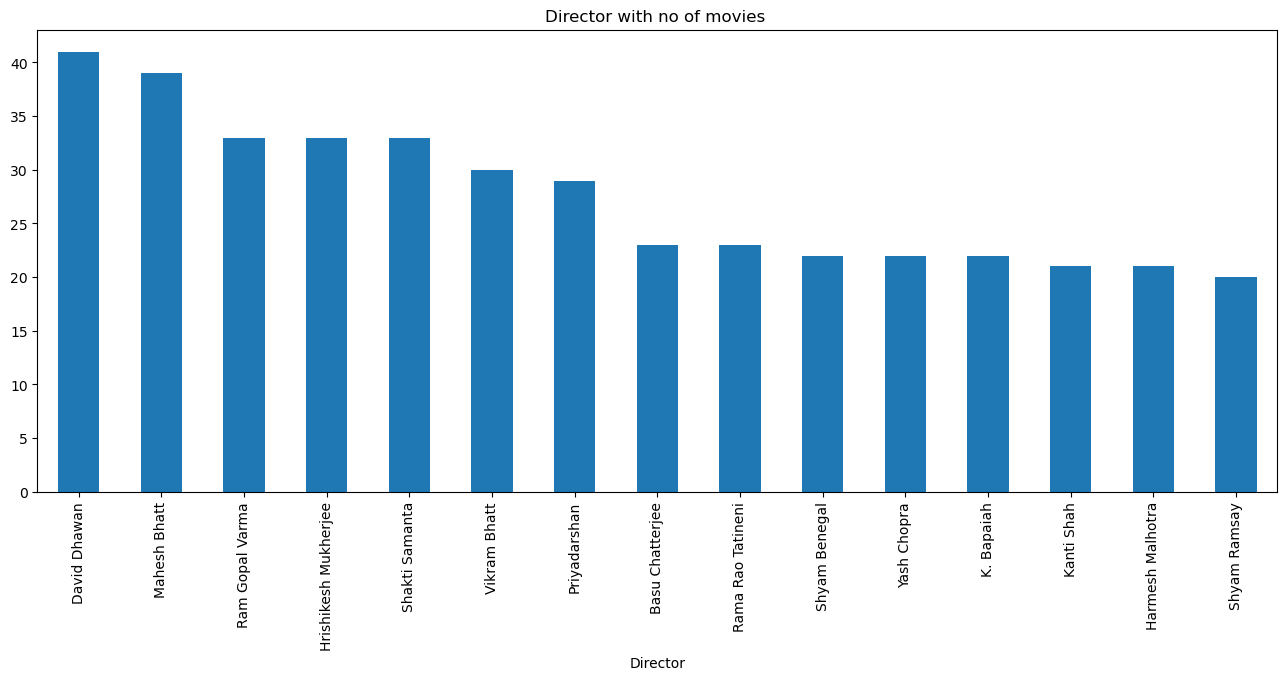

In [23]:
plt.figure(figsize=(16,6))
di=df["Director"].value_counts(ascending=False)[:15].plot(kind="bar")


plt.xticks(rotation=90)
plt.title("Director with no of movies ")

Text(0.5, 1.0, 'Popular Actor ')

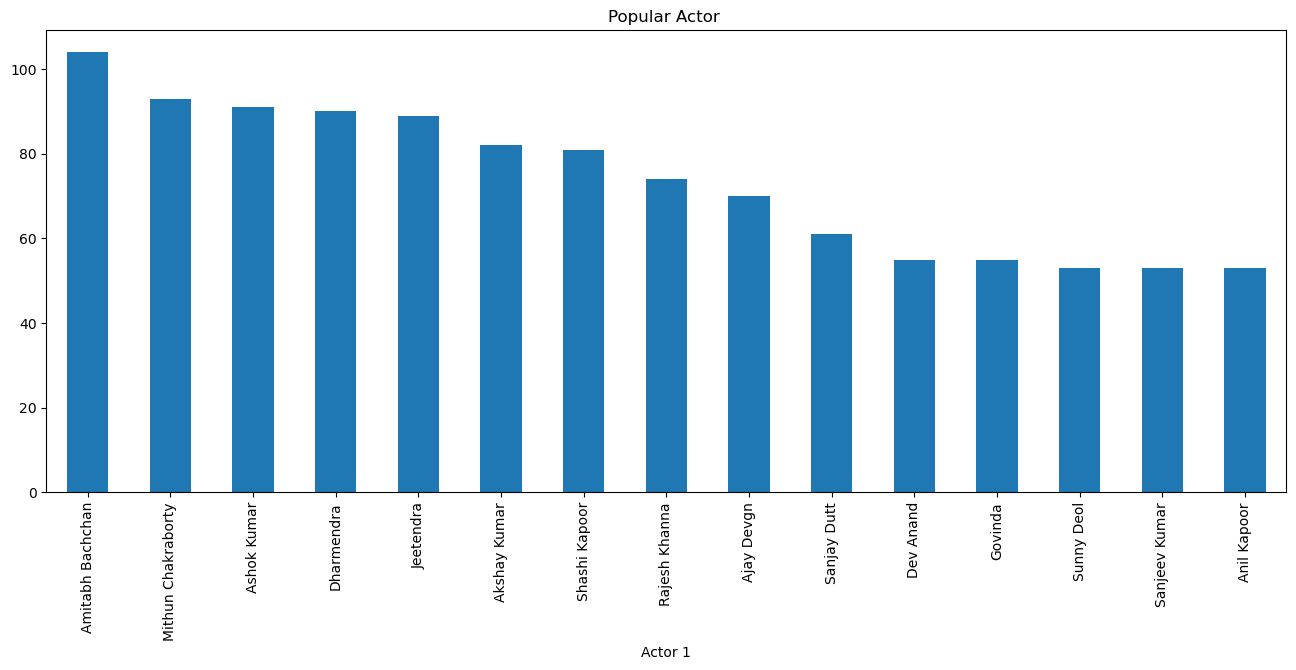

In [24]:
plt.figure(figsize=(16,6))
Ac=df["Actor 1"].value_counts(ascending=False)[:15].plot(kind="bar")


plt.xticks(rotation=90)
plt.title("Popular Actor ")


In [26]:
df[["Actor 1","Year","Rating","Votes"]].sort_values(by="Votes",ascending=False).head(10)

,Actor 1,Year,Rating,Votes
8219,Suraj Sharma,2012,7.9,591417
75,Aamir Khan,2009,8.4,357889
8233,Dev Patel,2016,8.0,220526
4848,Ben Kingsley,1982,8.0,220118
14038,Owen Wilson,2007,7.2,185127
8228,Amole Gupte,2007,8.4,175810
10882,Aamir Khan,2014,8.1,168150
3410,Aamir Khan,2016,8.4,165074
11463,Salman Khan,2021,1.8,162455
3829,Sushant Singh Rajput,2020,6.6,117377


In [27]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [28]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)

In [29]:
# removing unnecesaary column for prediction
df.drop("Name",axis=1,inplace=True)

<Axes: >

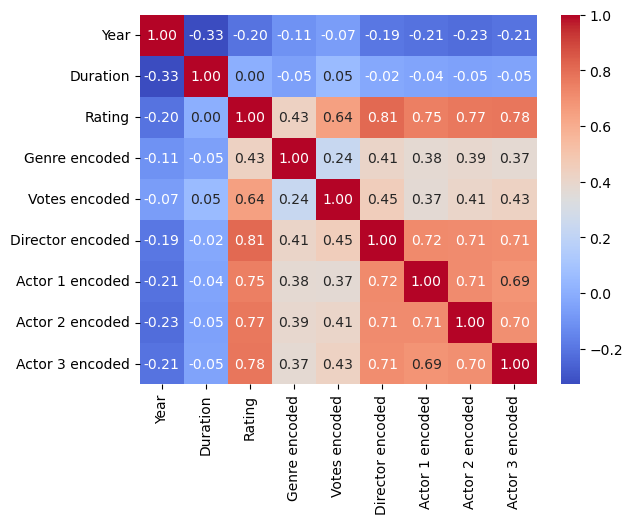

In [30]:
sns.heatmap(df.corr(),cmap="coolwarm",fmt=".2f",annot=True)

In [31]:
# dropping duration columns
df.drop("Duration",axis=1,inplace=True)

In [32]:
# features and target columns
x=df.drop("Rating",axis=1)
y=df["Rating"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [35]:
mse=mean_squared_error(y_pred,y_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR LR")
print(mse)


print("R2_SCORE FOR LR")
print(r2_score)

MSE FOR LR
0.30828962307964985
R2_SCORE FOR LR
0.8456202571073751


In [36]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR DTR")
print(mse)


print("R2_SCORE FOR DTR")
print(r2_score)

MSE FOR DTR
0.469434628975265
R2_SCORE FOR DTR
0.7649249540021901


In [37]:
from sklearn.svm import SVR

model=SVR().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR SVR")
print(mse)


print("R2_SCORE FOR SVR")
print(r2_score)

MSE FOR SVR
1.9536984478802375
R2_SCORE FOR SVR
0.021661964938901157


In [38]:
# RFR

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR RFR")
print(mse)


print("R2_SCORE FOR RFR")
print(r2_score)

MSE FOR RFR
0.2529890247349822
R2_SCORE FOR RFR
0.873312697965342


In [39]:
# gbr

from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR GBR")
print(mse)


print("R2_SCORE FOR GBR")
print(r2_score)

MSE FOR GBR
0.2643817621200459
R2_SCORE FOR GBR
0.8676076474651669


In [40]:
# ABR
from sklearn.ensemble import AdaBoostRegressor

model=AdaBoostRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR ABR")
print(mse)


print("R2_SCORE FOR ABR")
print(r2_score)

MSE FOR ABR
0.39043000316797294
R2_SCORE FOR ABR
0.804487472187587


In [41]:
from xgboost import XGBRegressor

model=XGBRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR XGBR")
print(mse)


print("R2_SCORE FOR XGBR")
print(r2_score)

MSE FOR XGBR
0.2684740989953113
R2_SCORE FOR XGBR
0.8655583604722334
